In [2]:
import os
os.listdir('./')

['svelte.config.js',
 'kde_theft.json',
 '.DS_Store',
 'chicago_outline.json',
 'node_modules',
 'crime_map.csv',
 'community_data.csv',
 'ChiDataSci.ipynb',
 '.npmrc',
 'README.md',
 'ChicagoDataScience.ipynb',
 '.gitignore',
 'package-lock.json',
 'package.json',
 'static',
 'Crimes_-_Map.csv',
 'chicagodata.json',
 'tsconfig.json',
 '.ipynb_checkpoints',
 '.svelte-kit',
 'vite.config.ts',
 '.git',
 'src']

In [57]:
import geopandas as gpd
df_neighborhoods = gpd.read_file('./src/Boundaries - Neighborhoods.json')
df_neighborhoods['shape_area'] = pd.to_numeric(df_neighborhoods['shape_area'])
df_neighborhoods['shape_area'].max()

371835607.687

In [43]:
import pandas as pd
import numpy as np
df = pd.read_csv('./Crimes_-_Map.csv')
df

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JF238175,05/11/2022 11:25:00 AM,002XX W MADISON ST,0860,THEFT,RETAIL THEFT,DRUG STORE,N,N,122,42.0,06,NaN,NaN,NaN,NaN,NaN
1,JF228949,04/25/2022 12:00:00 PM,010XX W DIVERSEY PKWY,0890,THEFT,FROM BUILDING,RESIDENCE - GARAGE,N,N,1933,44.0,06,NaN,NaN,NaN,NaN,NaN
2,JF186941,03/25/2022 07:55:00 PM,021XX W 21ST ST,0810,THEFT,OVER $500,STREET,N,N,1234,25.0,06,NaN,NaN,NaN,NaN,NaN
3,JF293270,06/24/2022 01:00:00 AM,054XX S Ingleside Ave,0810,THEFT,OVER $500,STREET,N,N,233,5.0,06,NaN,NaN,NaN,NaN,NaN
4,JF361213,08/16/2022 09:00:00 AM,013XX W FULTON ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,1215,27.0,06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245175,JF400411,09/18/2022 02:36:00 AM,013XX E 56TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,N,Y,235,5.0,08B,1186393.0,1868149.0,41.793323,-87.592045,"(41.793323121, -87.592044791)"
245176,JF348216,08/07/2022 07:00:00 PM,065XX S INGLESIDE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,VACANT LOT / LAND,N,N,321,20.0,07,1183680.0,1861925.0,41.776308,-87.602187,"(41.776307684, -87.602187052)"
245177,JF491050,11/28/2022 05:00:00 PM,082XX S KIMBARK AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,411,8.0,07,1186309.0,1850591.0,41.745144,-87.592907,"(41.74514439, -87.592907065)"
245178,JF417868,10/01/2022 01:35:00 PM,075XX N CLARK ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,Y,N,2422,49.0,06,1162907.0,1949949.0,42.018312,-87.675867,"(42.018311737, -87.675866628)"


In [5]:
new_df = df.drop(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR', ' SECONDARY DESCRIPTION', ' LOCATION DESCRIPTION', 'BEAT', 'WARD', 'FBI CD', 'X COORDINATE', 'Y COORDINATE', 'LOCATION'], axis=1)
new_df = new_df.dropna()
new_df.insert(0, "NEIGHBORHOOD", np.nan)
new_df.head()

,NEIGHBORHOOD,PRIMARY DESCRIPTION,ARREST,DOMESTIC,LATITUDE,LONGITUDE
11,NaN,THEFT,N,N,41.886801,-87.645920
14,NaN,ASSAULT,N,Y,41.880751,-87.723856
15,NaN,THEFT,N,N,42.018616,-87.665846
33,NaN,DECEPTIVE PRACTICE,N,N,41.806859,-87.732124
47,NaN,CRIMINAL TRESPASS,Y,N,41.854763,-87.689136


In [6]:
import shapely
from shapely.geometry import LineString, Point, Polygon, MultiPolygon
from shapely.strtree import STRtree

index = STRtree(df_neighborhoods.geometry.tolist())



In [7]:
for ind, i in enumerate(new_df.index):
    point = Point(new_df['LONGITUDE'][i],new_df['LATITUDE'][i])
    for polygon in index.query(point):
        new_df['NEIGHBORHOOD'][i] = (df_neighborhoods['pri_neigh'][polygon])
    

In [8]:
df_neighborhoods.head()

,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60668 41.815..."
1,Printers Row,PRINTERS ROW,2162137.97139,6864.247156,"POLYGON ((-87.62742 41.86741, -87.63044 41.867..."
2,United Center,UNITED CENTER,32520512.7053,23101.363745,"POLYGON ((-87.66707 41.88885, -87.66706 41.887..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,10482592.2987,13227.049745,"POLYGON ((-87.65871 41.93256, -87.65472 41.932..."
4,Humboldt Park,HUMBOLDT PARK,125010425.593,46126.751351,"POLYGON ((-87.74060 41.88782, -87.74069 41.890..."


In [9]:
so_df = new_df[(new_df[' PRIMARY DESCRIPTION'] == "MOTOR VEHICLE THEFT")]

In [10]:
a_df = so_df[so_df['ARREST'] == 'Y']
so_df.head()

,NEIGHBORHOOD,PRIMARY DESCRIPTION,ARREST,DOMESTIC,LATITUDE,LONGITUDE
157,Austin,MOTOR VEHICLE THEFT,N,N,41.912674,-87.752764
165,Gage Park,MOTOR VEHICLE THEFT,N,N,41.794691,-87.692606
170,Auburn Gresham,MOTOR VEHICLE THEFT,N,N,41.749649,-87.645227
173,Avondale,MOTOR VEHICLE THEFT,N,N,41.936854,-87.720172
179,"Little Italy, UIC",MOTOR VEHICLE THEFT,N,N,41.872965,-87.687511


In [11]:
a_df.value_counts(subset="NEIGHBORHOOD", normalize=False)

NEIGHBORHOOD
Austin             64
North Lawndale     30
Garfield Park      28
Englewood          23
Humboldt Park      21
                   ..
Calumet Heights     1
Riverdale           1
Bridgeport          1
Beverly             1
Fuller Park         1
Length: 76, dtype: int64

In [37]:
vals = new_df[(new_df[' PRIMARY DESCRIPTION'] == "THEFT")]['NEIGHBORHOOD'].value_counts()
vals_ind = vals.index
print(vals)

Loop              3292
West Town         2076
River North       2038
Lake View         1860
West Loop         1703
                  ... 
Jackson Park        49
Armour Square       47
Burnside            16
Jefferson Park      13
Andersonville        6
Name: NEIGHBORHOOD, Length: 91, dtype: int64


In [24]:
df_neighborhoods.insert(0, "num_motor_thefts", np.nan)

In [36]:
for i in df_neighborhoods['pri_neigh'].index:
    if df_neighborhoods['pri_neigh'][i] in vals_ind:
        df_neighborhoods['num_thefts'][i] = vals[df_neighborhoods['pri_neigh'][i]]
    else:
        df_neighborhoods['num_thefts'][i] = 0

/var/folders/q2/blj1b35943190bxj_nqhbpy0w9ff45/T/ipykernel_76149/3006988521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neighborhoods['num_thefts'][i] = vals[df_neighborhoods['pri_neigh'][i]]
/var/folders/q2/blj1b35943190bxj_nqhbpy0w9ff45/T/ipykernel_76149/3006988521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neighborhoods['num_thefts'][i] = 0


<Axes: >

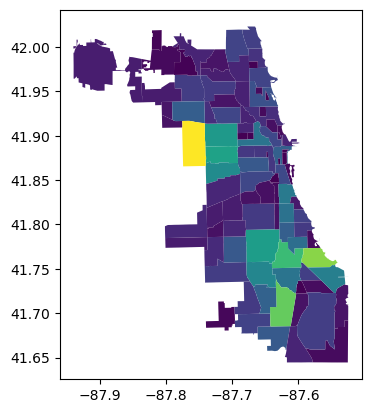

In [26]:
df_neighborhoods.plot(column="num_motor_thefts")

In [42]:
df_neighborhoods.to_file("chicagodata.json")

In [28]:
df_neighborhoods['pri_neigh'][1]

'Printers Row'

In [38]:
df_neighborhoods["num_thefts"] = df_neighborhoods["num_thefts"] / 3292

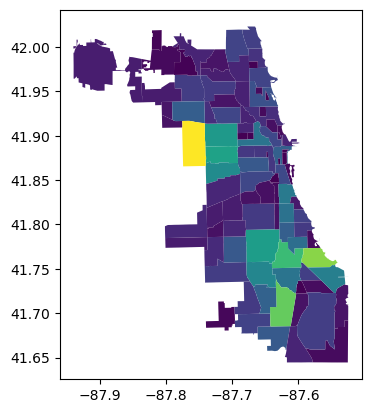

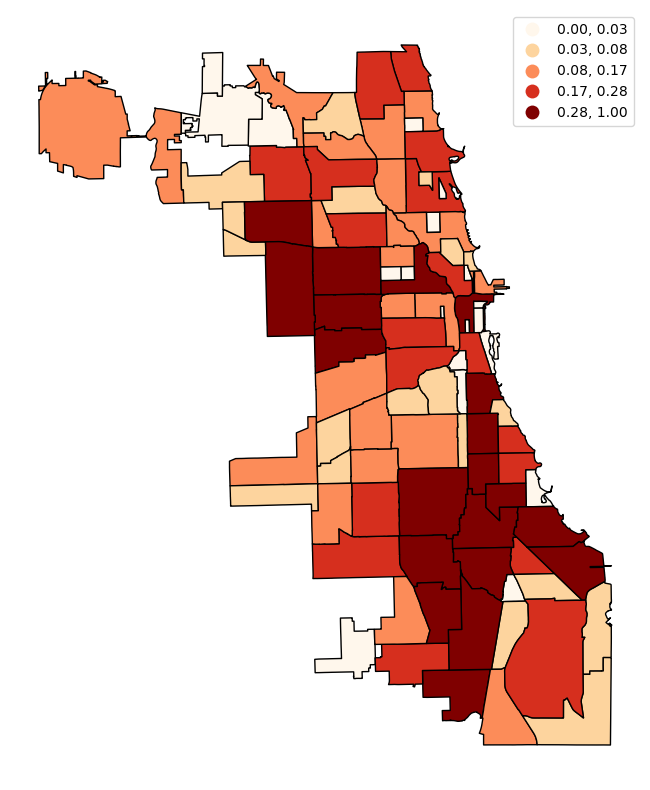

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify

df_neighborhoods.plot(column="num_motor_thefts", missing_kwds={'color': 'lightgrey'})

df_neighborhoods.plot(column="num_motor_thefts",
                               edgecolor="black",
                               legend=True,
                               scheme="quantiles",
                               figsize=(15,10),
                               cmap='OrRd',
                               missing_kwds={
                                   "color": "lightgrey",
                                   "edgecolor": "red",
                                   "hatch": "///",
                                   "label": "No theft"
                               }).set_axis_off()

In [40]:
for i in df_neighborhoods[df_neighborhoods["num_thefts"] == 0].index:
    df_neighborhoods["num_thefts"][i] = np.nan

/var/folders/q2/blj1b35943190bxj_nqhbpy0w9ff45/T/ipykernel_76149/3090499026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neighborhoods["num_thefts"][i] = np.nan


In [41]:
df_neighborhoods

,num_motor_thefts,num_thefts,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,0.378378,0.165857,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60668 41.815..."
1,NaN,NaN,Printers Row,PRINTERS ROW,2162137.97139,6864.247156,"POLYGON ((-87.62742 41.86741, -87.63044 41.867..."
2,0.160776,0.070474,United Center,UNITED CENTER,32520512.7053,23101.363745,"POLYGON ((-87.66707 41.88885, -87.66706 41.887..."
3,0.023562,0.010328,Sheffield & DePaul,SHEFFIELD & DEPAUL,10482592.2987,13227.049745,"POLYGON ((-87.65871 41.93256, -87.65472 41.932..."
4,0.536383,0.235115,Humboldt Park,HUMBOLDT PARK,125010425.593,46126.751351,"POLYGON ((-87.74060 41.88782, -87.74069 41.890..."
...,...,...,...,...,...,...,...
93,0.293139,0.128493,Belmont Cragin,"BELMONT CRAGIN,HERMOSA",109099407.211,43311.706886,"POLYGON ((-87.74134 41.91390, -87.74601 41.914..."
94,1.000000,0.438335,Austin,AUSTIN,170037750.826,55473.345911,"POLYGON ((-87.74134 41.91390, -87.74130 41.912..."
95,0.029106,0.012758,Gold Coast,GOLD COAST,7165705.53467,13685.479377,"POLYGON ((-87.62446 41.91157, -87.62466 41.911..."
96,NaN,NaN,Boystown,BOYSTOWN,3365778.97115,9780.268985,"POLYGON ((-87.64878 41.93999, -87.64927 41.939..."


In [ ]:
theft_df = new_df[new_df[' PRIMARY DESCRIPTION'] == 'THEFT']
motor_theft_df = new_df[new_df[' PRIMARY DESCRIPTION'] == 'MOTOR VEHICLE THEFT']
motor_theft_df.insert(0, 'geometry', np.nan)
theft_df.insert(0, 'geometry', np.nan)
theft_coords = list(zip(theft_df['LONGITUDE'], theft_df['LATITUDE']))
motor_theft_coords = list(zip(motor_theft_df['LONGITUDE'], theft_df['LATITUDE']))

In [ ]:
for i, ind in enumerate(motor_theft_df['geometry'].index):
     motor_theft_df['geometry'][ind] = Point(motor_theft_df['LONGITUDE'][ind], motor_theft_df['LATITUDE'][ind])

for i, ind in enumerate(theft_df['geometry'].index):
     theft_df['geometry'][ind] = Point(theft_df['LONGITUDE'][ind], theft_df['LATITUDE'][ind])

In [ ]:
motor_theft_df

In [ ]:
import geoplot as gplt
import geopandas as gpd
import pandas as pd; 


usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
usa_cities.head()


In [ ]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR", "TX", "FL"]')
continental_usa_cities.head()



In [ ]:
theft_g = gpd.GeoDataFrame(geometry=theft_df['geometry'])
motor_theft_g = gpd.GeoDataFrame(geometry=motor_theft_df['geometry'])
geometry = gpd.GeoDataFrame(geometry=df_neighborhoods["geometry"])
geometry

In [ ]:
motor_theft_g["weights"] = float(0.0001836547)
theft_g["weights"] = float(0.0004075643)

In [ ]:
ax1 = gplt.polyplot(df_neighborhoods["geometry"].explode(ignore_index=True),    zorder=-1,
    linewidth=1,
    edgecolor='black',
    facecolor='lightgray',
    figsize=(30, 30))
gplt.pointplot(theft_g,legend_kwargs={ "marker":'o',"markersize": "0.1"}, ax=ax1)



In [ ]:
ax2 = gplt.polyplot(df_neighborhoods["geometry"].explode(),linewidth=1 ,  edgecolor='black',
    facecolor='lightgray', figsize=(30,30))
gplt.pointplot(motor_theft_g,legend_kwargs={ "marker":'o',"markersize": "0.1"}, ax=ax2)


In [ ]:
motor_theft_kde = gplt.kdeplot(motor_theft_g,  cmap='Reds')


In [ ]:
theft_kde = gplt.kdeplot(theft_g, cmap='Reds', legend=True)


In [ ]:
motor_theft_kde.collections[5].get_facecolors()

In [ ]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd

boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

gplt.pointplot(collisions)

In [ ]:
ax = gplt.kdeplot(collisions, cmap='Reds', shade=False, projection=gcrs.AlbersEqualArea())


In [ ]:
for i in motor_theft_kde.get_children():
    print(i)


In [ ]:
polygons = []
for i in theft_kde.get_children():
    if str(type(i)) == "<class 'matplotlib.collections.PathCollection'>":
        for path in i.get_paths():
            polygons.append(Polygon(path.to_polygons()[0]))

In [ ]:
heatmap = gpd.GeoDataFrame(geometry=polygons)

In [ ]:
heatmap.plot(edgecolor="black", cmap="OrRd")

In [ ]:
polygons

In [ ]:
new_df

In [ ]:
gdf = gpd.GeoDataFrame(geometry=polygons)

In [ ]:
gdf.to_file("kde_theft.json")

In [ ]:
chicago_neighborhoods = gpd.read_file("./../chi_data_science/chicagodata.json")


In [ ]:
chicago_boundary = chicago_neighborhoods.unary_union

In [ ]:
chicago_boundary

In [ ]:
chicago_outline = gpd.GeoDataFrame(geometry=[chicago_boundary])


In [ ]:
community_df

In [ ]:
chicago_outline.to_file("chicago_outline.json")

In [ ]:
community_df = pd.read_csv("./community_data.csv")

In [ ]:
for x in community_df.iloc[0].index:
    if community_df.iloc[0][x] in df_neighborhoods.pri_neigh.tolist():
#         print(community_df.iloc[1][x])
#         print(community_df.iloc[2][x])
        df_neighborhoods[(df_neighborhoods['pri_neigh'] == community_df.iloc[0][x])]['population'] = community_df.iloc[1][x]
        df_neighborhoods[(df_neighborhoods['pri_neigh'] == community_df.iloc[0][x])]['income'] = community_df.iloc[2][x]
        df_neighborhoods[(df_neighborhoods['pri_neigh'] == community_df.iloc[0][x])]['latinos'] = community_df.iloc[4][x]
        df_neighborhoods[(df_neighborhoods['pri_neigh'] == community_df.iloc[0][x])]['blacks'] = community_df.iloc[5][x]
        df_neighborhoods[(df_neighborhoods['pri_neigh'] == community_df.iloc[0][x])]['whites'] = community_df.iloc[6][x]
        df_neighborhoods[(df_neighborhoods['pri_neigh'] == community_df.iloc[0][x])]['asians'] = community_df.iloc[7][x] 
        df_neighborhoods[(df_neighborhoods['pri_neigh'] == community_df.iloc[0][x])]['other'] = community_df.iloc[8][x]
    
    
    

In [ ]:
df_neighborhoods.iloc[(df_neighborhoods['pri_neigh'] == community_df.iloc[0][x]).tolist().index(True)].loc['population']

In [ ]:
df_neighborhoods.num_thefts = df_neighborhoods.num_thefts/1443

In [ ]:
df_neighborhoods

In [8]:
import json 
from shapely.geometry import MultiPolygon, shape
import geopandas as gpd


outline = gpd.read_file("./chicago_outline.json")

# load the geojson file into a shapely object
mp = outline
# calculate the centroid of the multipolygon
centroid = mp.centroid

# print the centroid
print(centroid)

0    POINT (-87.68597 41.83724)
dtype: geometry


/var/folders/q2/blj1b35943190bxj_nqhbpy0w9ff45/T/ipykernel_19002/2820728753.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = mp.centroid
